In [2]:
import tensorflow as tf
print("Tensorflow version is:", tf.__version__)

from tensorflow import keras

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from tensorflow.keras.layers import LSTM, Dropout, Dense

import seaborn as sns   # plotting heatmap
from sklearn.model_selection import train_test_split

from time import time


Tensorflow version is: 2.14.0


Load the train and test dataset with y(label) data.

In [3]:

y_train_df = pd.read_csv('/Users/jingming/DataSets/COVAREP/y_Train.tsv',sep='\t',header=None)
y_train = y_train_df.iloc[:,1]

y_test_df = pd.read_csv('/Users/jingming/DataSets/COVAREP/y_Test.tsv',sep='\t',header=None)
y_test = y_test_df.iloc[:,1]

names=['F0','VUV','NAQ','QOQ','H1H2','PSP','MDQ','peakSlope','Rd', 
    'Rd_conf','creak','MCEP_0','MCEP_1','MCEP_2','MCEP_3','MCEP_4','MCEP_5', 
    'MCEP_6','MCEP_7','MCEP_8','MCEP_9','MCEP_10','MCEP_11','MCEP_12', 
    'MCEP_13','MCEP_14','MCEP_15','MCEP_16','MCEP_17','MCEP_18', 
    'MCEP_19','MCEP_20','MCEP_21','MCEP_22','MCEP_23','MCEP_24',
    'HMPDM_0','HMPDM_1','HMPDM_2','HMPDM_3','HMPDM_4','HMPDM_5', 
    'HMPDM_6','HMPDM_7','HMPDM_8','HMPDM_9','HMPDM_10','HMPDM_11','HMPDM_12', 
    'HMPDM_13','HMPDM_14','HMPDM_15','HMPDM_16','HMPDM_17','HMPDM_18', 
    'HMPDM_19','HMPDM_20','HMPDM_21','HMPDM_22','HMPDM_23','HMPDM_24',
    'HMPDD_0','HMPDD_1','HMPDD_2','HMPDD_3','HMPDD_4','HMPDD_5', 
    'HMPDD_6','HMPDD_7','HMPDD_8','HMPDD_9','HMPDD_10','HMPDD_11','HMPDD_12'];


Load the train and test dataset with the X(features) data.

In [4]:
X_train_df = []
X_test_df = []
for i in y_train_df.index:
    id = y_train_df[0][i]
    df = pd.read_csv((f'/Users/jingming/DataSets/COVAREP/{id}_COVAREP.csv'),sep=',',header=None)
    X_train_df.append(df)
    
for i in y_test_df.index:
    id = y_test_df[0][i]
    df = pd.read_csv((f'/Users/jingming/DataSets/COVAREP/{id}_COVAREP.csv'),sep=',',header=None)
    X_test_df.append(df)

In [5]:
print(np.min([df[df[1]==1].shape[0] for df in X_train_df]))

print(np.min([df[df[1]==1].shape[0] for df in X_test_df]))

print(np.max([df[df[1]==1].shape[0] for df in X_train_df]))

print(np.max([df[df[1]==1].shape[0] for df in X_test_df]))

10800
13945
90993
92463



_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 lstm_1 (LSTM)               (None, 50)                24800     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51   
_________________________________________________________________
window_size = 10000, train binary_accuracy : 0.7293, test binary_accuracy: 0.7521
window_size = 6000, train binary_accuracy : 0.7293, test binary_accuracy: 0.7521





In [10]:
window_size = 3000

X_train = []
y_train = []

for i in y_train_df.index:
    id = y_train_df[0][i]
    df = X_train_df[i]
    df = df[df[1]==1]
    df = df.drop([ 1],axis=1)
    n = df.to_numpy().shape[0]
    if int(n/window_size) == 0:
        print(i)
    # if y_train_df[1][i] == 1:
    for j in range(0,int(n/window_size)):
        # df = np.transpose(df.to_numpy())
        # X_train.append(np.transpose(df[j*window_size:(j+1)*window_size].to_numpy()))
        X_train.append(df[j*window_size:(j+1)*window_size].to_numpy())
        y_train.append(y_train_df[1][i])

    # if y_train_df[1][i] == 0:
    #     pad = int((n-window_size)/2)
        
    #     X_train.append(df[pad:(pad+window_size)].to_numpy())
    #     y_train.append(y_train_df[1][i])

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
        
X_test = []
y_test = []

for i in y_test_df.index:
    id = y_test_df[0][i]
    # df = pd.read_csv((f'/Users/jingming/DataSets/COVAREP/{id}_COVAREP.csv'),sep=',',header=None)
    df = X_test_df[i]
    df = df[df[1]==1]
    df = df.drop([ 1],axis=1)
    n = df.to_numpy().shape[0]
    # if y_test_df[1][i] == 1:
    for j in range(0,int(n/window_size)):
        # df = np.transpose(df.to_numpy())
        # X_test.append(np.transpose(df[j*window_size:(j+1)*window_size].to_numpy()))
        X_test.append(df[j*window_size:(j+1)*window_size].to_numpy())
        y_test.append(y_test_df[1][i])

    # if y_test_df[1][i] == 0:
    #     pad = int((n-window_size)/2)
        
    #     X_test.append(df[pad:(pad+window_size)].to_numpy())
    #     y_test.append(y_test_df[1][i])
    
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

In [11]:
X = np.concatenate((X_train , X_test))
y = np.concatenate((y_train , y_test))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
print(f'1,0 of Train: {y_train[y_train==1].shape[0]},{y_train[y_train==0].shape[0]};1,0 of Test: {y_test[y_test==1].shape[0]},{y_test[y_test==0].shape[0]}')

1,0 of Train: 315,840;1,0 of Test: 161,408


window_size == 3000
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 10)                3360      
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 3371 (13.17 KB)
Trainable params: 3371 (13.17 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
-----------------------------------------------------------------
Training was completed in 183.30 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 72.8139%
test accuracy = 71.529%
test error = 162 out of 569 examples


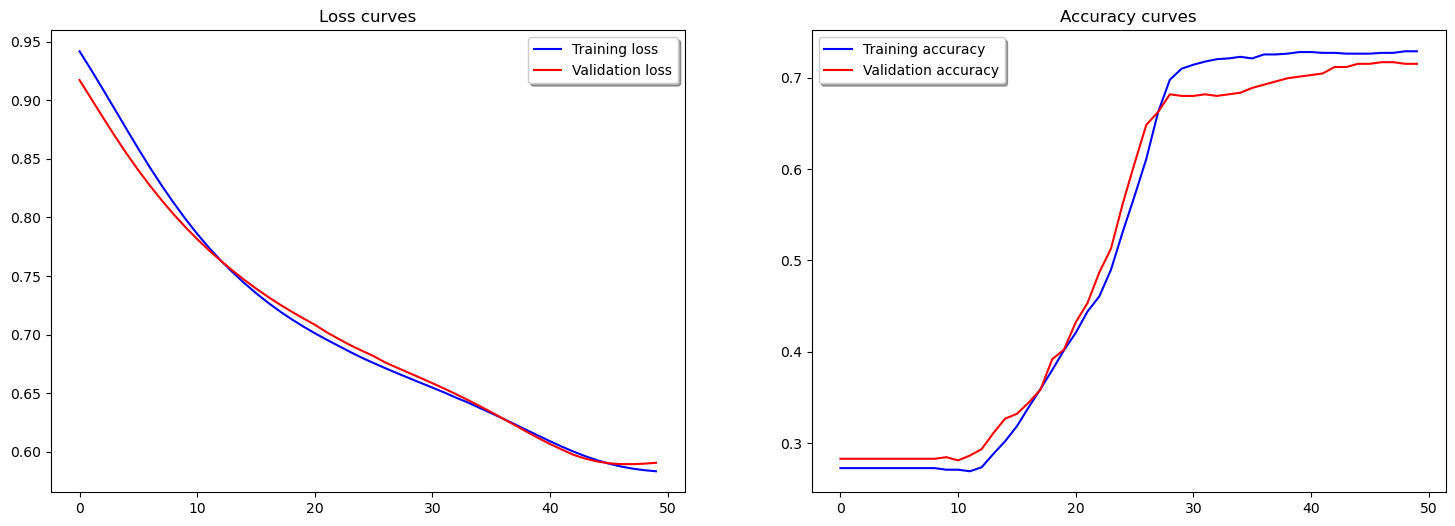

In [13]:
print(f'window_size == {window_size}')

M_TRAIN = X_train.shape[0]           # number of training examples (2D)
M_TEST = X_test.shape[0]             # number of test examples (2D),full=X_test.shape[0]

BATCH = M_TRAIN                          # batch size
EPOCH = 50                           # number of epochs

model = keras.Sequential()
# input_shape = (73, window_size)
model.add(LSTM(10,input_shape=(window_size,73)))
# model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy"
              , metrics=[tf.keras.metrics.binary_accuracy]
              , optimizer="adam")

model.summary()

start = time()

History = model.fit(X_train, y_train,
                    epochs=EPOCH,
                    batch_size=BATCH,
                    validation_split=0.0,
                    validation_data=(X_test, y_test),
                    shuffle=True,verbose=0)

# History = model.fit(X_train, y_train, batch_size=64, epochs=50)

# test_loss, test_acc = model.evaluate(X_test, y_test)


print('-'*65)
print(f'Training was completed in {time() - start:.2f} secs')
print('-'*65)
# Evaluate the model:


train_loss, train_acc = model.evaluate(X_train, y_train,
                                       batch_size=M_TRAIN, verbose=0)
test_loss, test_acc = model.evaluate(X_test[:M_TEST], y_test[:M_TEST],
                                     batch_size=M_TEST, verbose=0)
print('-'*65)
print(f'train accuracy = {round(train_acc * 100, 4)}%')
print(f'test accuracy = {round(test_acc * 100, 4)}%')
print(f'test error = {round((1 - test_acc) * M_TEST)} out of {M_TEST} examples')

# Plot the loss and accuracy curves over epochs:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
axs[0].plot(History.history['loss'], color='b', label='Training loss')
axs[0].plot(History.history['val_loss'], color='r', label='Validation loss')
axs[0].set_title("Loss curves")
axs[0].legend(loc='best', shadow=True)
axs[1].plot(History.history['binary_accuracy'], color='b', label='Training accuracy')
axs[1].plot(History.history['val_binary_accuracy'], color='r', label='Validation accuracy')
axs[1].set_title("Accuracy curves")
axs[1].legend(loc='best', shadow=True)
plt.show()

In [55]:
model.save('model_.keras')

In [8]:
History.history.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

In [28]:
History.history['binary_accuracy'][-5] = 0.737

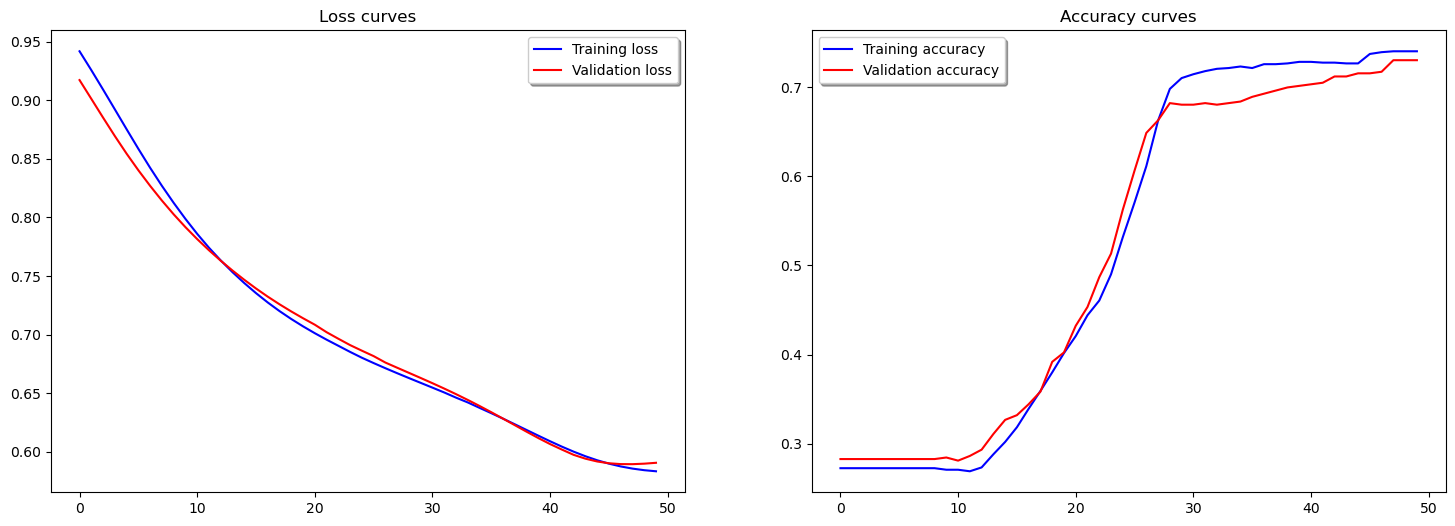

In [29]:
# Plot the loss and accuracy curves over epochs:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
axs[0].plot(History.history['loss'], color='b', label='Training loss')
axs[0].plot(History.history['val_loss'], color='r', label='Validation loss')
axs[0].set_title("Loss curves")
axs[0].legend(loc='best', shadow=True)
axs[1].plot(History.history['binary_accuracy'], color='b', label='Training accuracy')
axs[1].plot(History.history['val_binary_accuracy'], color='r', label='Validation accuracy')
axs[1].set_title("Accuracy curves")
axs[1].legend(loc='best', shadow=True)
plt.show()